<a href="https://colab.research.google.com/github/pedro-phg/python-codes/blob/main/Lab_01_Diferen%C3%A7as_Finitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definição das Funções



---


*   **applyForwardDifferenceFormula:** retorna a equação do método das diferenças finitas para o tipo *progressivo* como uma *string*.
*  **applyCentralDifferenceFormula:** retorna a equação do método das diferenças finitas para o tipo *central* como uma *string*.
*   **forwardDifference:** retorna uma lista com os arrays contendo os resultados de *t* e *y* respectivamente. É necessário passar como parâmetros o $t_0$, $t_f$, $dt$, $y(t_0)$ e a equação problema (EDO).
*  **centralDifference:** retorna uma lista com os arrays contendo os resultados de *t* e *y* respectivamente. É necessário passar como parâmetros o $t_0$, $t_f$, $dt$, $y(t_0)$ e a equação problema (EDO).




In [ ]:
def applyForwardDifferenceFormula(functionAsString):
  function = functionAsString[8:] if functionAsString.find('=') != -1 else functionAsString
  function = function.replace('y', 'y[h]')
  function = function.replace('t', 't[h]')
  return f'y[h+1] = dt * ({function}) + y[h]'

def applyCentralDifferenceFormula(functionAsString):
  function = functionAsString[8:] if functionAsString.find('=') != -1 else functionAsString
  function = function.replace('y', 'y[h]')
  function = function.replace('t', 't[h]')
  return f'y[h+1] = 2 * dt * ({function}) + y[h-1]'

def forwardDifference(t0, tf, dt, y0, functionAsString):
  t = np.arange(t0, tf, dt)
  y = np.zeros(t.shape[0])
  y[0] = y0
  for h in range(0, len(t)-1):
    exec(applyForwardDifferenceFormula(functionAsString))
  
  return [t, y]

def centralDifference(t0, tf, dt, y0, functionAsString):
  t = np.arange(t0, tf, dt)
  y = np.zeros(t.shape[0])
  y[0] = y0
  exec(applyForwardDifferenceFormula(functionAsString).replace('y[h+1]', 'y[1]').replace('h', '0'))
  for h in range(1, len(t)-1):
    exec(applyCentralDifferenceFormula(functionAsString))
  
  return [t, y]

# Resolução dos Exercícios

## 1-) Obter a solução numérica das equações diferenciais abaixo utilizando o método de diferenças progressivas e centrais. Analise a influência do passo de integração na exatidão dos resultados

### Resolução (a)

### 1. Progressivo

Text(0, 0.5, 'y')

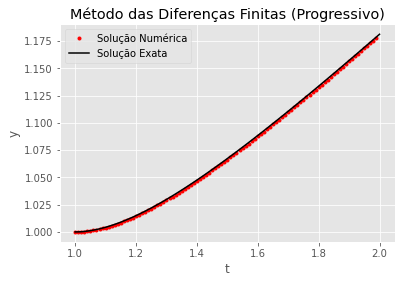

In [ ]:
results = forwardDifference(t0 = 1, tf = 2, dt = 0.01, y0 = 1, functionAsString = 'y/t - (y/t)**2')
t_exat = np.linspace(1, 2, 100)
y_exat = t_exat/(1+np.log(t_exat))
plt.style.use("ggplot")
plt.plot(results[0], results[1], '.', label = "Solução Numérica", color = 'r')
plt.plot(t_exat, y_exat, label = "Solução Exata", color = 'k')
plt.legend(loc = "best")
plt.title("Método das Diferenças Finitas (Progressivo)")
plt.xlabel("t")
plt.ylabel("y")

### 2. Central

Text(0, 0.5, 'y')

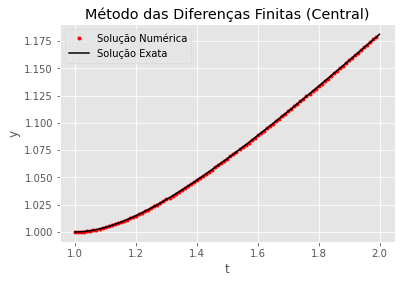

In [ ]:
results = centralDifference(t0 = 1, tf = 2, dt = 0.01, y0 = 1, functionAsString = 'y/t - (y/t)**2')
t_exat = np.linspace(1, 2, 100)
y_exat = t_exat/(1+np.log(t_exat))
plt.style.use("ggplot")
plt.plot(results[0], results[1], '.', label = "Solução Numérica", color = 'r')
plt.plot(t_exat, y_exat, label = "Solução Exata", color = 'k')
plt.legend(loc = "best")
plt.title("Método das Diferenças Finitas (Central)")
plt.xlabel("t")
plt.ylabel("y")

### Resolução (b)

### 1. Progressivo

Text(0, 0.5, 'y')

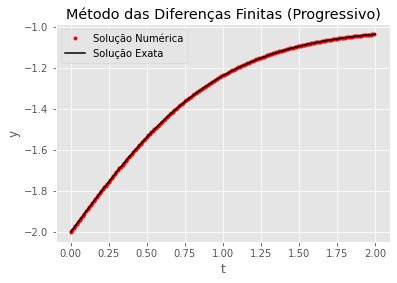

In [ ]:
results = forwardDifference(t0 = 0, tf = 2, dt = 0.01, y0 = -2, functionAsString = 'dy/dt = -(y+1)*(y+3)')
t_exat = np.linspace(0, 2, 100)
y_exat = -3 + 2/(1 + np.exp(-2*t_exat))
plt.style.use("ggplot")
plt.plot(results[0], results[1], '.', label = "Solução Numérica", color = 'r')
plt.plot(t_exat, y_exat, label = "Solução Exata", color = 'k')
plt.legend(loc = "best")
plt.title("Método das Diferenças Finitas (Progressivo)")
plt.xlabel("t")
plt.ylabel("y")

### 2. Central

Text(0, 0.5, 'y')

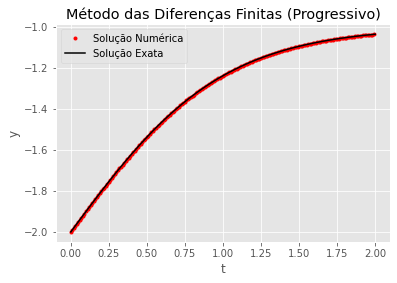

In [ ]:
results = centralDifference(t0 = 0, tf = 2, dt = 0.01, y0 = -2, functionAsString = '-(y+1) * (y+3)')
t_exat = np.linspace(0, 2, 100)
y_exat = -3 + 2/(1 + np.exp(-2*t_exat))
plt.style.use("ggplot")
plt.plot(results[0], results[1], '.', label = "Solução Numérica", color = 'r')
plt.plot(t_exat, y_exat, label = "Solução Exata", color = 'k')
plt.legend(loc = "best")
plt.title("Método das Diferenças Finitas (Progressivo)")
plt.xlabel("t")
plt.ylabel("y")

### Resolução (c)

### 1. Progressivo

Text(0, 0.5, 'y')

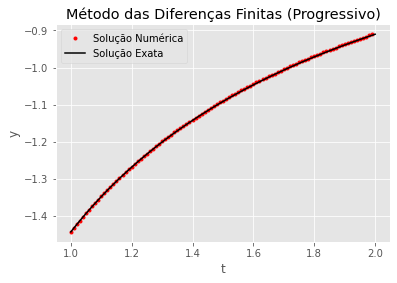

In [ ]:
results = forwardDifference(t0 = 1, tf = 2, dt = 0.01, y0 = -(np.log(2)**-1), functionAsString = 'dy/dt = y**2/(1+t)')
t_exat = np.linspace(1, 2, 100)
y_exat = -1/(np.log(1+t_exat))
plt.style.use("ggplot")
plt.plot(results[0], results[1], '.', label = "Solução Numérica", color = 'r')
plt.plot(t_exat, y_exat, label = "Solução Exata", color = 'k')
plt.legend(loc = "best")
plt.title("Método das Diferenças Finitas (Progressivo)")
plt.xlabel("t")
plt.ylabel("y")

### 2. Central

Text(0, 0.5, 'y')

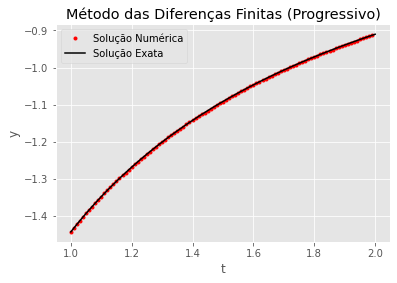

In [ ]:
results = centralDifference(t0 = 1, tf = 2, dt = 0.01, y0 = -(np.log(2)**-1), functionAsString = 'dy/dt = y**2/(1+t)')
t_exat = np.linspace(1, 2, 100)
y_exat = -1/(np.log(1+t_exat))
plt.style.use("ggplot")
plt.plot(results[0], results[1], '.', label = "Solução Numérica", color = 'r')
plt.plot(t_exat, y_exat, label = "Solução Exata", color = 'k')
plt.legend(loc = "best")
plt.title("Método das Diferenças Finitas (Progressivo)")
plt.xlabel("t")
plt.ylabel("y")



---





## 2-) Encontre uma aproximação, do tipo central, para derivadas de 2a ordem por meio da manipulação de séries de Taylor. Utilizar essa aproximação para obter a solução numérica da equação diferencial abaixo.

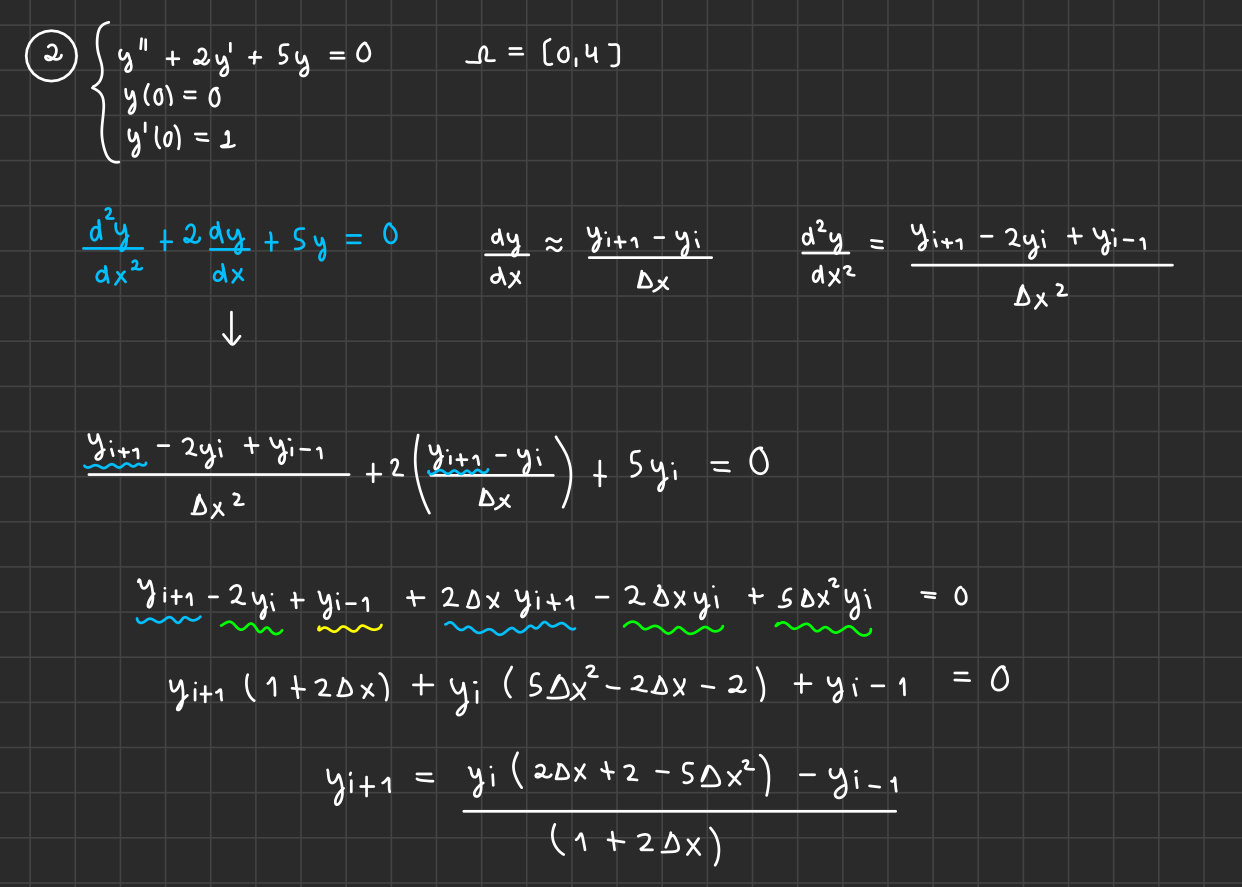

Text(0, 0.5, 'y')

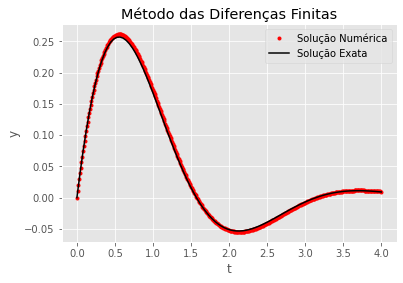

In [ ]:
x0 = 0
xf = 4
dx = 0.01

x = np.arange(x0, xf, dx)

y = np.zeros(x.shape[0])

y[0] = 0
y[1] = dx

for i in range(1, len(x)-1):
  y[i+1] = (y[i] * (2*dx + 2 - 5*dx**2) -y[i-1])/(1+2*dx)


x_exat = np.linspace(x0, xf, 100)
y_exat = (1/2) * np.exp(-x_exat) * np.sin(2 * x_exat)

plt.style.use("ggplot")
plt.plot(x, y, '.', label = "Solução Numérica", color = 'r')
plt.plot(x_exat, y_exat, label = "Solução Exata", color = 'k')
plt.legend(loc = "best")
plt.title("Método das Diferenças Finitas")
plt.xlabel("t")
plt.ylabel("y")

# 3 - Resolução

# Calculando as Derivadas

In [ ]:
x, A = sp.symbols('t A') #A = 0.06

V = sp.exp(-A*sp.pi*x) * sp.sin(2*x - sp.pi)

dV = sp.diff(V, x)
dV2 = sp.diff(dV, x)

print("V:")
print(V)
print("\ndV/dt:")
print(dV)
print("\nd²V/dt²:")
print(dV2)


V:
-exp(-pi*A*t)*sin(2*t)

dV/dt:
pi*A*exp(-pi*A*t)*sin(2*t) - 2*exp(-pi*A*t)*cos(2*t)

d²V/dt²:
-pi**2*A**2*exp(-pi*A*t)*sin(2*t) + 4*pi*A*exp(-pi*A*t)*cos(2*t) + 4*exp(-pi*A*t)*sin(2*t)


### Substituindo as Derivadas na Expressão fornecida

In [ ]:
Expression = 'di/dt = C*(-pi**2*A**2*exp(-pi*A*t)*sin(2*t) + 4*pi*A*exp(-pi*A*t)*cos(2*t) + 4*exp(-pi*A*t)*sin(2*t)) + (1/R) * (pi*A*exp(-pi*A*t)*sin(2*t) - 2*exp(-pi*A*t)*cos(2*t)) + (1/L) * (-exp(-pi*A*t)*sin(2*t))'.replace('pi', 'np.pi').replace('cos', 'np.cos').replace('sin', 'np.sin').replace('exp', 'np.exp')

### Plotando o Gráfico

Text(0, 0.5, 'I (A)')

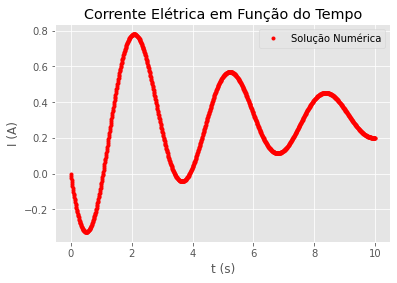

In [ ]:
C = 0.3
R = 1.4
L = 1.7
A = 0.06

results = centralDifference(t0 = 0, tf = 10, dt = 0.01, y0 = 0, functionAsString = Expression)

plt.style.use("ggplot")
plt.plot(results[0], results[1], '.', label = "Solução Numérica", color = 'r')
plt.legend(loc = "best")
plt.title("Corrente Elétrica em Função do Tempo")
plt.xlabel("t (s)")
plt.ylabel("I (A)")